In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")


In [3]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

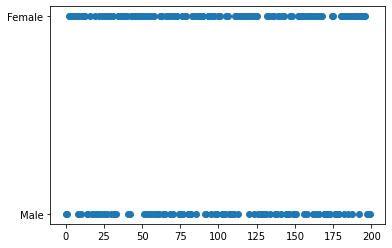

In [4]:
#univariate analysis
plt.scatter(dataset.index,dataset['Gender'])
plt.show()

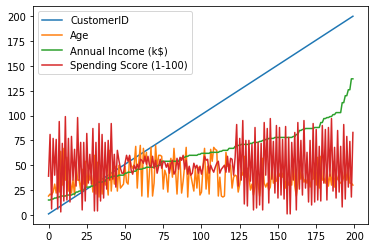

In [5]:
#Bivariate
dataset.plot.line()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


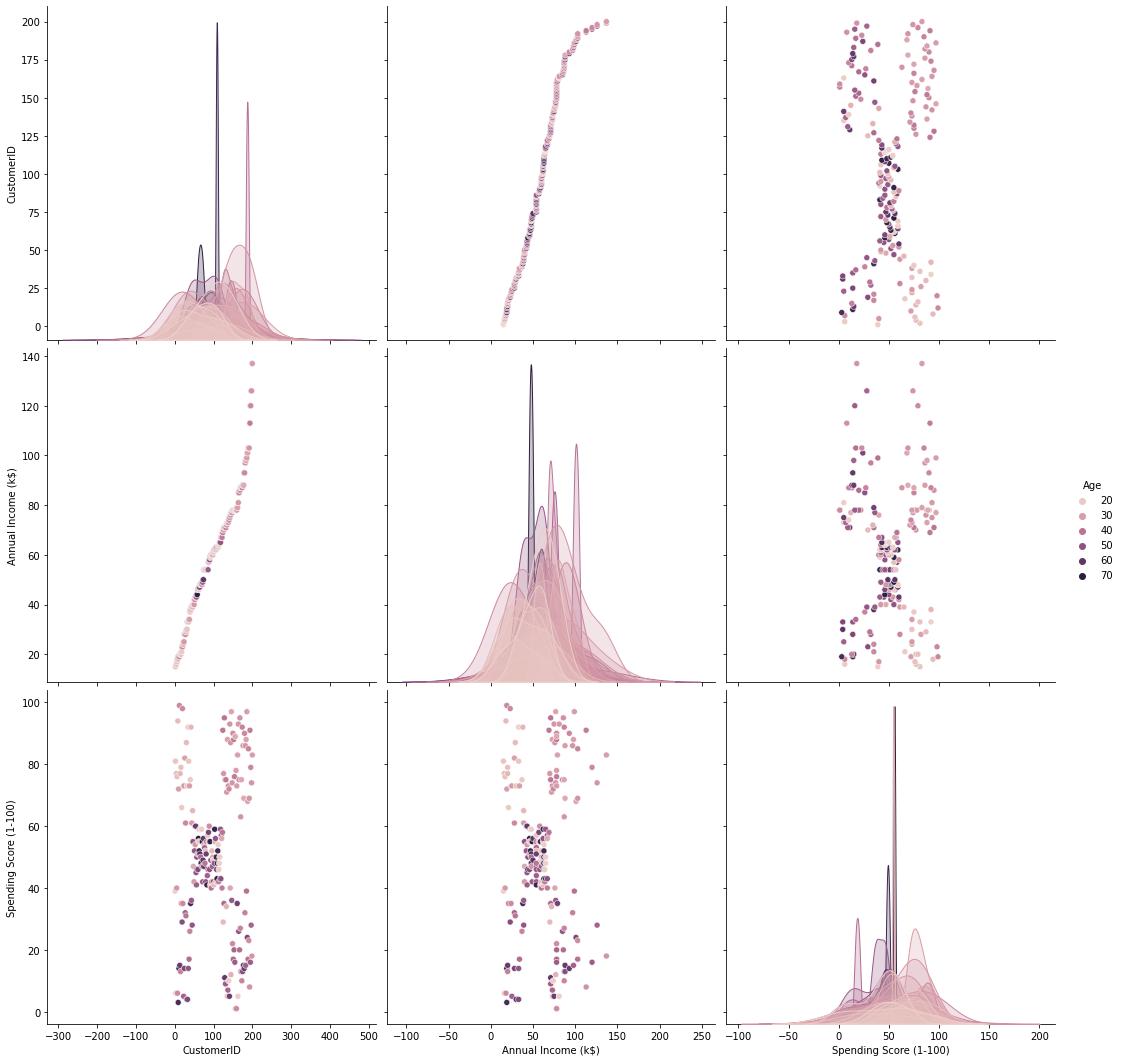

In [6]:
#Multivarite Analysis
sns.pairplot(dataset,hue="Age",size=5)


In [7]:
#Perform Descriptive Statistics on dataset
stats = dataset['Age'].describe()
print(stats)

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [8]:
#Handling Missing values
dataset.shape


(200, 5)

In [9]:
dataset.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
dataset.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# ***Find the outliers and replace them outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


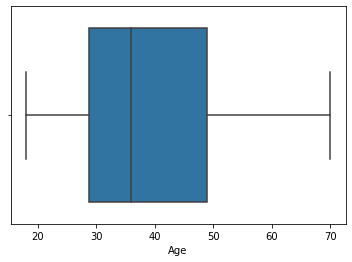

In [11]:

import seaborn as sns
sns.boxplot(dataset['Age'],data=dataset)

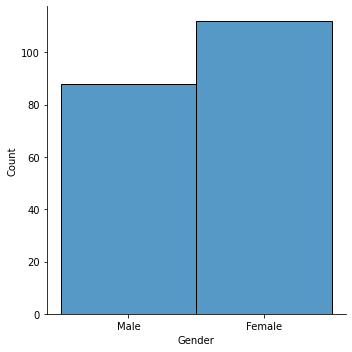

In [12]:
sns.displot(dataset['Gender'])

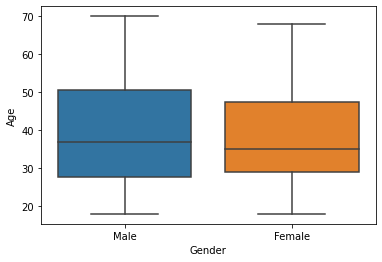

In [13]:
sns.boxplot(x='Gender',y='Age' ,data=dataset)


# **Categorical columns and perform encoding**

In [14]:
dataset.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
pd.get_dummies(dataset, columns=["Age"]).head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,Male,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Male,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Female,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Female,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Female,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_tips=pd.get_dummies(dataset)
data_tips

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


# **Scaling the data**

In [17]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("Mall_Customers.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

# **Perform any of the clustering algorithms- k means clustering**

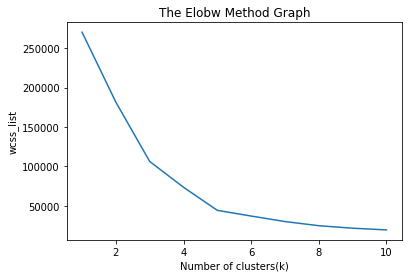

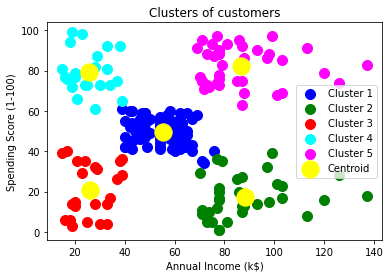

In [18]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    
dataset = pd.read_csv('Mall_Customers.csv')  
x = dataset.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans  
wcss_list= []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') 
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')   
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()

#***Add the cluster data with the primary dataset***

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
data = pd.read_csv('Mall_Customers.csv') 
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
from sklearn.cluster import KMeans
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


# **Split data into independent and dependent variables**

In [20]:
X = dataset.iloc[:, :-1].values
print(X)


[[1 'Male' 19 15]
 [2 'Male' 21 15]
 [3 'Female' 20 16]
 [4 'Female' 23 16]
 [5 'Female' 31 17]
 [6 'Female' 22 17]
 [7 'Female' 35 18]
 [8 'Female' 23 18]
 [9 'Male' 64 19]
 [10 'Female' 30 19]
 [11 'Male' 67 19]
 [12 'Female' 35 19]
 [13 'Female' 58 20]
 [14 'Female' 24 20]
 [15 'Male' 37 20]
 [16 'Male' 22 20]
 [17 'Female' 35 21]
 [18 'Male' 20 21]
 [19 'Male' 52 23]
 [20 'Female' 35 23]
 [21 'Male' 35 24]
 [22 'Male' 25 24]
 [23 'Female' 46 25]
 [24 'Male' 31 25]
 [25 'Female' 54 28]
 [26 'Male' 29 28]
 [27 'Female' 45 28]
 [28 'Male' 35 28]
 [29 'Female' 40 29]
 [30 'Female' 23 29]
 [31 'Male' 60 30]
 [32 'Female' 21 30]
 [33 'Male' 53 33]
 [34 'Male' 18 33]
 [35 'Female' 49 33]
 [36 'Female' 21 33]
 [37 'Female' 42 34]
 [38 'Female' 30 34]
 [39 'Female' 36 37]
 [40 'Female' 20 37]
 [41 'Female' 65 38]
 [42 'Male' 24 38]
 [43 'Male' 48 39]
 [44 'Female' 31 39]
 [45 'Female' 49 39]
 [46 'Female' 24 39]
 [47 'Female' 50 40]
 [48 'Female' 27 40]
 [49 'Female' 29 40]
 [50 'Female' 31

In [22]:
Y = dataset.iloc[:, -1].values
print(Y)


[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


# **split The data into training and testing**

In [21]:
from sklearn.model_selection import train_test_split
y1 = dataset.Age
x1 = dataset.drop('Age',axis=1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
print(x1_test.shape)
print(x1_train.shape)
print(y1_test.shape)
print(y1_train.shape)

(40, 4)
(160, 4)
(40,)
(160,)


# **Build The Model**

In [23]:
dataset.columns
dataset = dataset.dropna(axis=0)
y= dataset.CustomerID
melbourne_features = ['Age', 'Annual Income (k$)', 'CustomerID']
X= dataset[melbourne_features]
X.describe()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor(random_state=2)
melbourne_model.fit(X, y)
print(X.head())
print(melbourne_model.predict(X.head()))

   Age  Annual Income (k$)  CustomerID
0   19                  15           1
1   21                  15           2
2   20                  16           3
3   23                  16           4
4   31                  17           5
[1. 2. 3. 4. 5.]


# **Train and Test the model**

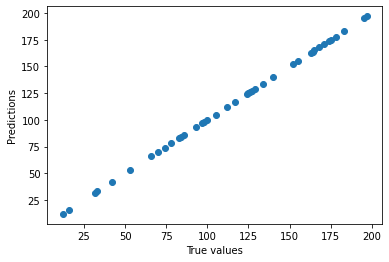

In [24]:
from sklearn.linear_model import LinearRegression as lm
model=lm().fit(X_train,y_train)
predictions=model.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

# **Measure the performance using Evaluation Metrices**

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
X_actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Y_predic = [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
results = confusion_matrix(X_actual, Y_predic)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))
print('AUC-ROC:',roc_auc_score(X_actual, Y_predic))
print('LOGLOSS Value is',log_loss(X_actual, Y_predic))

X_actual = [5, -1, 2, 10]
Y_predic = [3.5, -0.9, 2, 9.9]
print ('R Squared =',r2_score(X_actual, Y_predic))
print ('MAE =',mean_absolute_error(X_actual, Y_predic))
print ('MSE =',mean_squared_error(X_actual, Y_predic))

Confusion Matrix :
[[3 3]
 [1 3]]
Accuracy Score is 0.6
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

AUC-ROC: 0.625
LOGLOSS Value is 13.815750437193334
R Squared = 0.9656060606060606
MAE = 0.42499999999999993
MSE = 0.5674999999999999
